
## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button



# Load necessary libraries

To begin, we need to import the necessary libraries.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Pandas working with GFF3 files

A few lessons ago, we starting working with gff3 (General Feature Format version 3) files, which is standard file format for describing genes, transcripts, and other features in a genome. We used Pandas to manipulate the data. Now we want to plot it.

For this excercise, we will download annotations for severla maize genomes and compare them. (Skip if you pulled the repository recently)

In [ ]:
## in bash (note the exclamation point in front of standard commands)
!curl -O https://download.maizegdb.org/Zm-B97-REFERENCE-NAM-1.0/Zm-B97-REFERENCE-NAM-1.0_Zm00018ab.1.gff3.gz
!curl -O  https://download.maizegdb.org/Zm-CML52-REFERENCE-NAM-1.0/Zm-CML52-REFERENCE-NAM-1.0_Zm00019ab.1.gff3.gz
!curl -O  https://download.maizegdb.org/Zm-CML322-REFERENCE-NAM-1.0/Zm-CML322-REFERENCE-NAM-1.0_Zm00025ab.1.gff3.gz
!curl -O  https://download.maizegdb.org/Zm-CML333-REFERENCE-NAM-1.0/Zm-CML333-REFERENCE-NAM-1.0_Zm00026ab.1.gff3.gz
!curl -O  https://download.maizegdb.org/Zm-HP301-REFERENCE-NAM-1.0/Zm-HP301-REFERENCE-NAM-1.0_Zm00027ab.1.gff3.gz
!curl -O  https://download.maizegdb.org/Zm-M37W-REFERENCE-NAM-1.0/Zm-M37W-REFERENCE-NAM-1.0_Zm00032ab.1.gff3.gz
!curl -O  https://download.maizegdb.org/Zm-NC350-REFERENCE-NAM-1.0/Zm-NC350-REFERENCE-NAM-1.0_Zm00036ab.1.gff3.gz
!curl -O  https://download.maizegdb.org/Zm-Oh43-REFERENCE-NAM-1.0/Zm-Oh43-REFERENCE-NAM-1.0_Zm00039ab.1.gff3.gz
!curl -O  https://download.maizegdb.org/Zm-P39-REFERENCE-NAM-1.0/Zm-P39-REFERENCE-NAM-1.0_Zm00040ab.1.gff3.gz
!curl -O  https://download.maizegdb.org/Zm-Tzi8-REFERENCE-NAM-1.0/Zm-Tzi8-REFERENCE-NAM-1.0_Zm00042ab.1.gff3.gz
!gunzip Zm-B97-REFERENCE-NAM-1.0_Zm00018ab.1.gff3.gz
!gunzip Zm-CML52-REFERENCE-NAM-1.0_Zm00019ab.1.gff3.gz
!gunzip Zm-CML322-REFERENCE-NAM-1.0_Zm00025ab.1.gff3.gz
!gunzip Zm-CML333-REFERENCE-NAM-1.0_Zm00026ab.1.gff3.gz
!gunzip Zm-HP301-REFERENCE-NAM-1.0_Zm00027ab.1.gff3.gz
!gunzip Zm-M37W-REFERENCE-NAM-1.0_Zm00032ab.1.gff3.gz
!gunzip Zm-NC350-REFERENCE-NAM-1.0_Zm00036ab.1.gff3.gz
!gunzip Zm-Oh43-REFERENCE-NAM-1.0_Zm00039ab.1.gff3.gz
!gunzip Zm-P39-REFERENCE-NAM-1.0_Zm00040ab.1.gff3.gz
!gunzip Zm-Tzi8-REFERENCE-NAM-1.0_Zm00042ab.1.gff3.gz

## A function to import GFF3 files and compute length metrics

In [3]:
import pandas as pd

def read_gff3(file, name):
    """
    Read a GFF3 file and extract information about mRNA sequences marked as canonical transcripts.

    Parameters:
        file (str): Path to the GFF3 file to read.
        name (str): Name of the organism or reference genome.

    Returns:
        pandas.DataFrame: DataFrame containing mRNA IDs, lengths, and organism names.
    """

    # Define column names for the GFF3 file
    columns = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
    
    # Read the GFF3 file into a DataFrame
    df = pd.read_csv(file, sep='\t', comment='#', header=None, names=columns)
    
    # Filter rows to extract only mRNA sequences marked as canonical transcripts
    filter_condition = (df['type'] == 'mRNA') & (df['attributes'].str.contains('canonical_transcript=1'))
    df = df[filter_condition]
    
    # Calculate mRNA lengths
    df['length'] = df['end'] - df['start'] + 1
    
    # Extract mRNA IDs from attributes
    df['mRNA'] = df['attributes'].str.extract(r'ID=(.*?);')
    
    # Add organism or reference genome name
    df['name'] = name
    
    # Select relevant columns
    df = df[['mRNA', 'length', 'name']]
    
    # return the results
    return df


In [4]:
# The files we need to process, in the format {name : file}

files = {'B73' : 'Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3', 
         'B97' : 'Zm-B97-REFERENCE-NAM-1.0_Zm00018ab.1.gff3',
         'CML52': 'Zm-CML52-REFERENCE-NAM-1.0_Zm00019ab.1.gff3',
         'CML322': 'Zm-CML322-REFERENCE-NAM-1.0_Zm00025ab.1.gff3',
         'CML333': 'Zm-CML333-REFERENCE-NAM-1.0_Zm00026ab.1.gff3',
         'HP301': 'Zm-HP301-REFERENCE-NAM-1.0_Zm00027ab.1.gff3',
         'M37W': 'Zm-M37W-REFERENCE-NAM-1.0_Zm00032ab.1.gff3',
         'NC350': 'Zm-NC350-REFERENCE-NAM-1.0_Zm00036ab.1.gff3',
         'Oh43': 'Zm-Oh43-REFERENCE-NAM-1.0_Zm00039ab.1.gff3',
         'P39': 'Zm-P39-REFERENCE-NAM-1.0_Zm00040ab.1.gff3',
         'Tzi8': 'Zm-Tzi8-REFERENCE-NAM-1.0_Zm00042ab.1.gff3'}

# lets run the function for each file and concatenate the results
dfs = [] # initialize en empty list where we will store the dataframes

for name, file in files.items(): # .items() iterates over the dictionary
    df = read_gff3(file, name)
    dfs.append(df)
df = pd.concat(dfs) # takes the list of dataframes and stacks them into one df

# let's save this as a CSV file
df.to_csv('maize_mRNA.csv', index=False)

## Read the df of mRNA length

Maybe we finished writing the dataframe to csv late one night, so we decide to quit for the night. The next day, we might have to read the file back in.

In [10]:
df.to_csv('maize_mRNA.csv', index=False)
df = pd.read_csv('maize_mRNA.csv')

First, let's look at the number of genes/mRNAs per maize line. Remember, we can do this with `.groupby` to get numbers (*e.g.*, `df.groupby('name')['mRNA'].agg('count')`) but maybe we want to visualize it instead. Luckily, seaborn will count for us:

<Axes: xlabel='name', ylabel='count'>

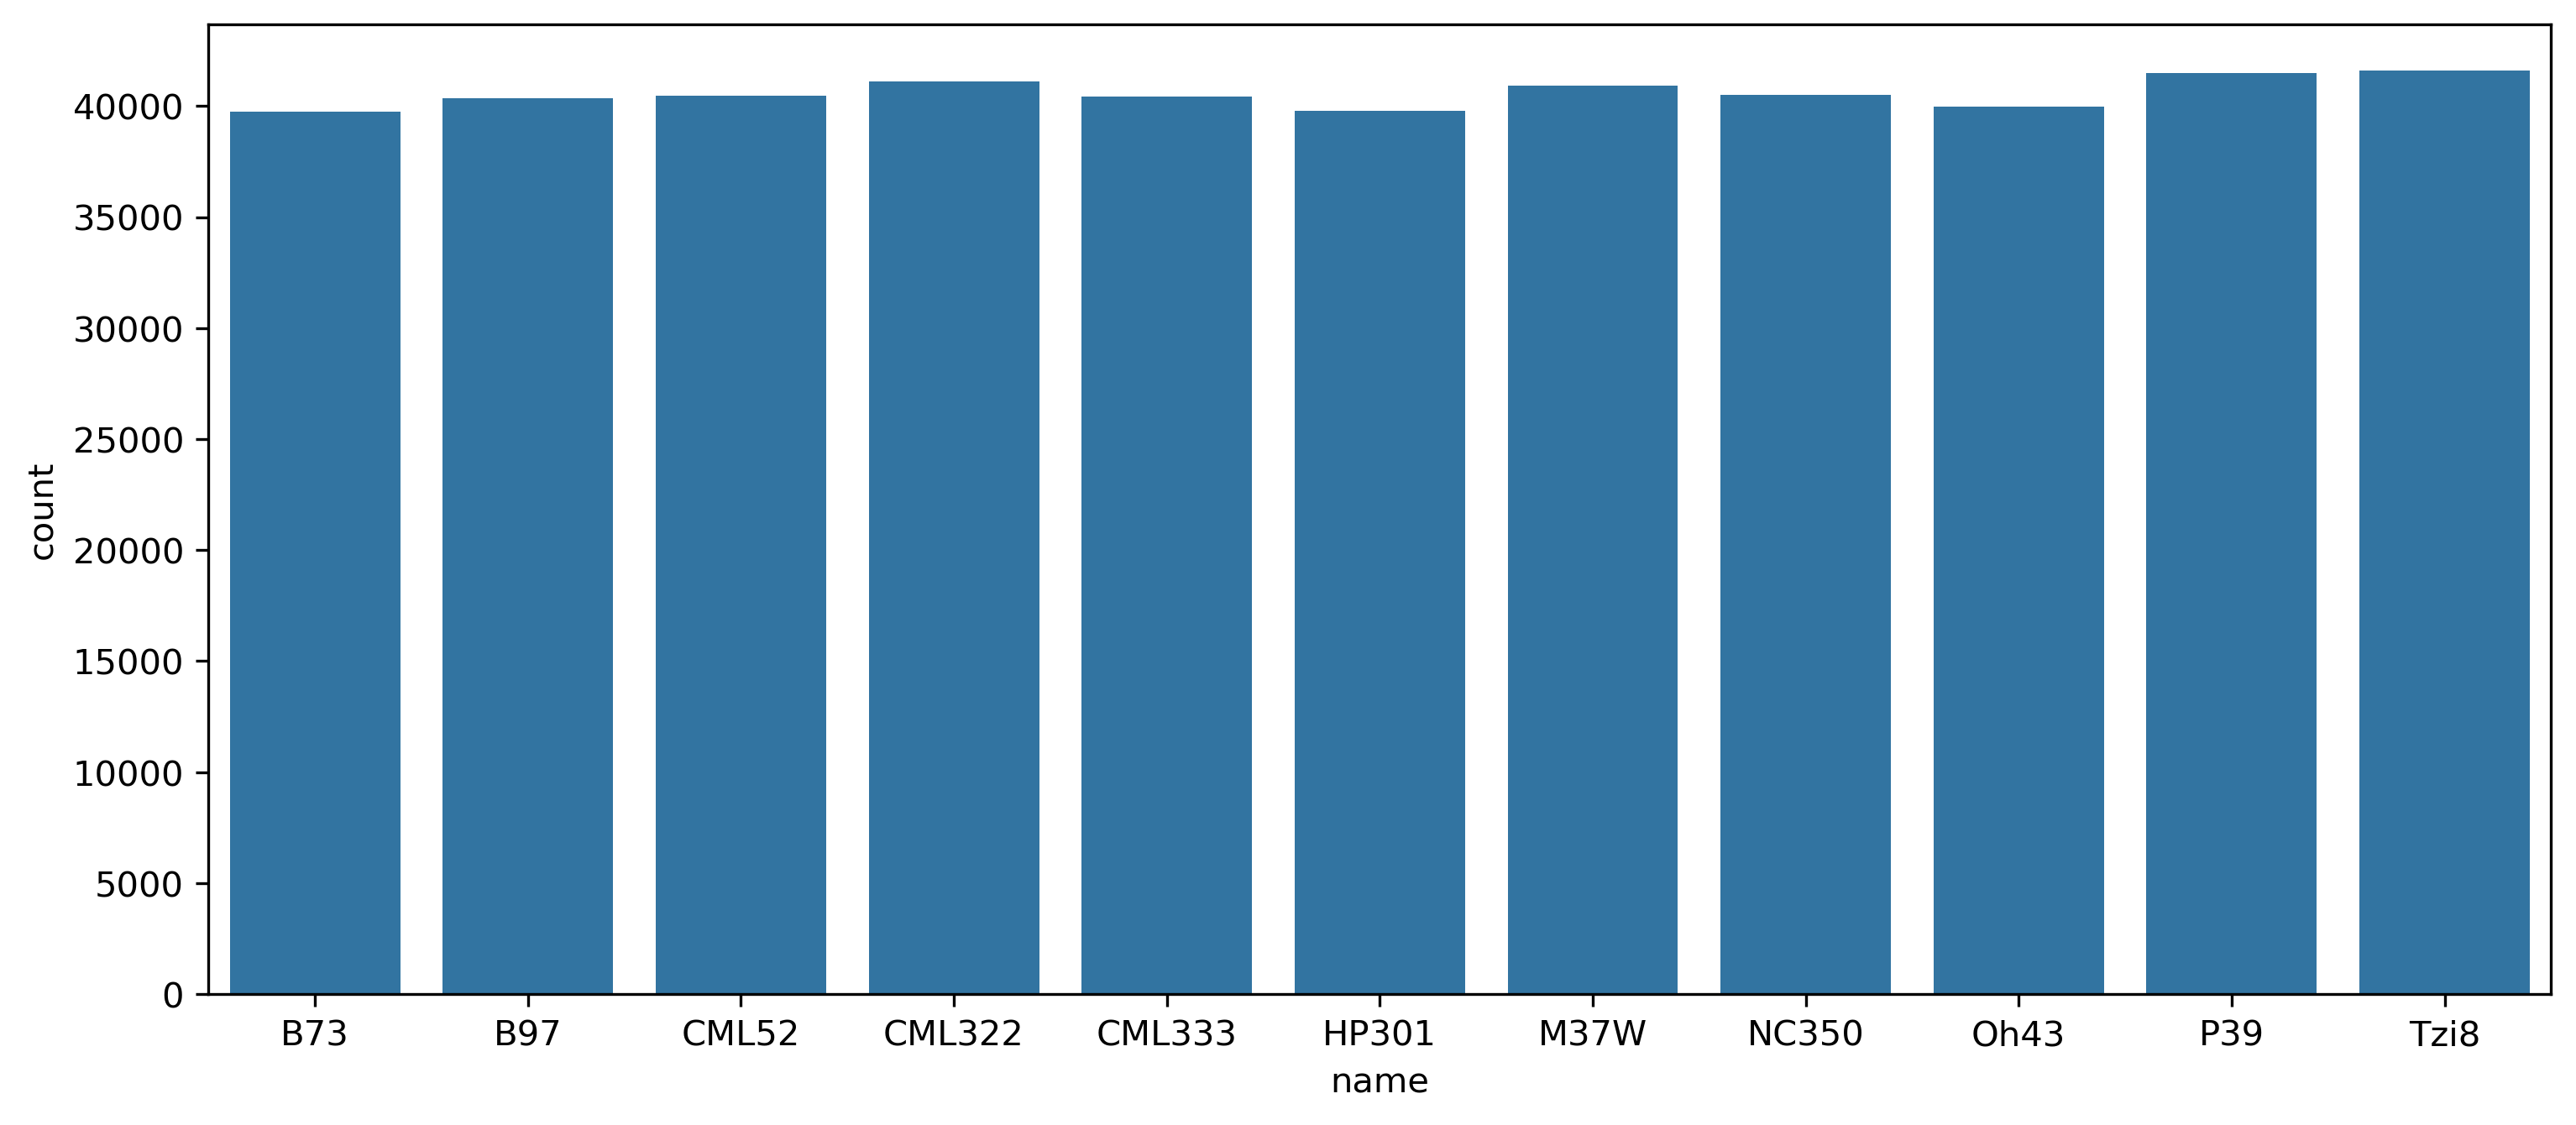

In [12]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['figure.dpi'] = 300
sns.countplot(data= df, x='name', stat='count')

Nice, but a little boring. We can color them based on maize line:

<Axes: xlabel='name', ylabel='count'>

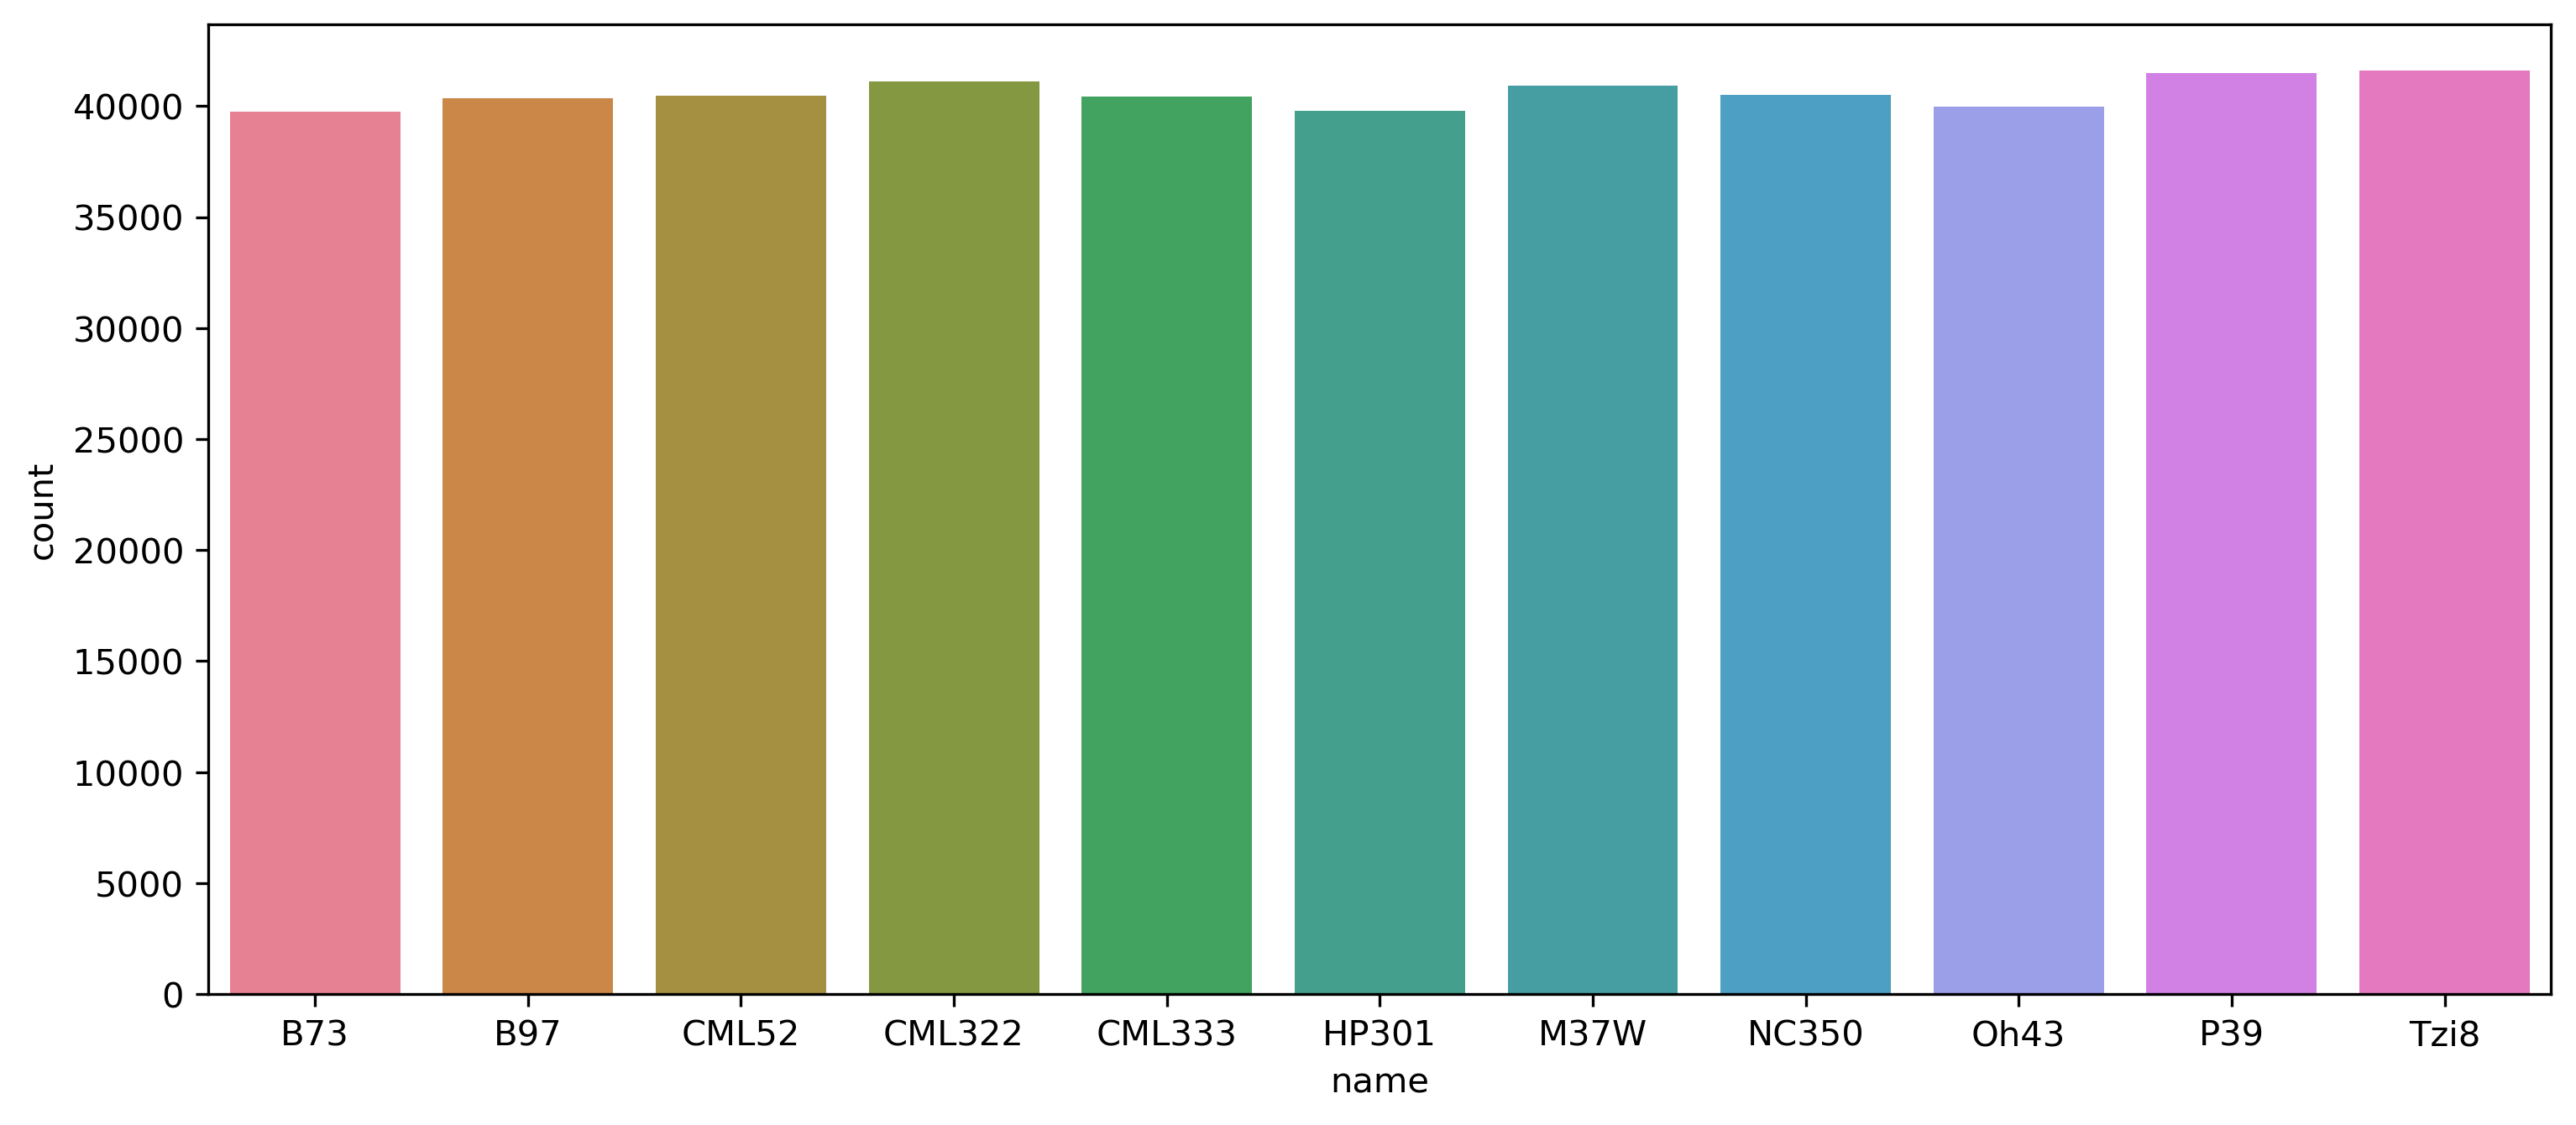

In [13]:
sns.countplot(data= df, x='name', stat='count', hue='name')

`sns.boxplot` is a seaborn function used to draw a box plot to visually represent the distribution of data within categories. It displays the distribution of quantitative data across several levels of one or more categorical variables. The box plot summarizes the central tendency, spread, and shape of the dataset's distribution, making it useful for comparing distributions and identifying outliers within different groups.

<Axes: xlabel='name', ylabel='length'>

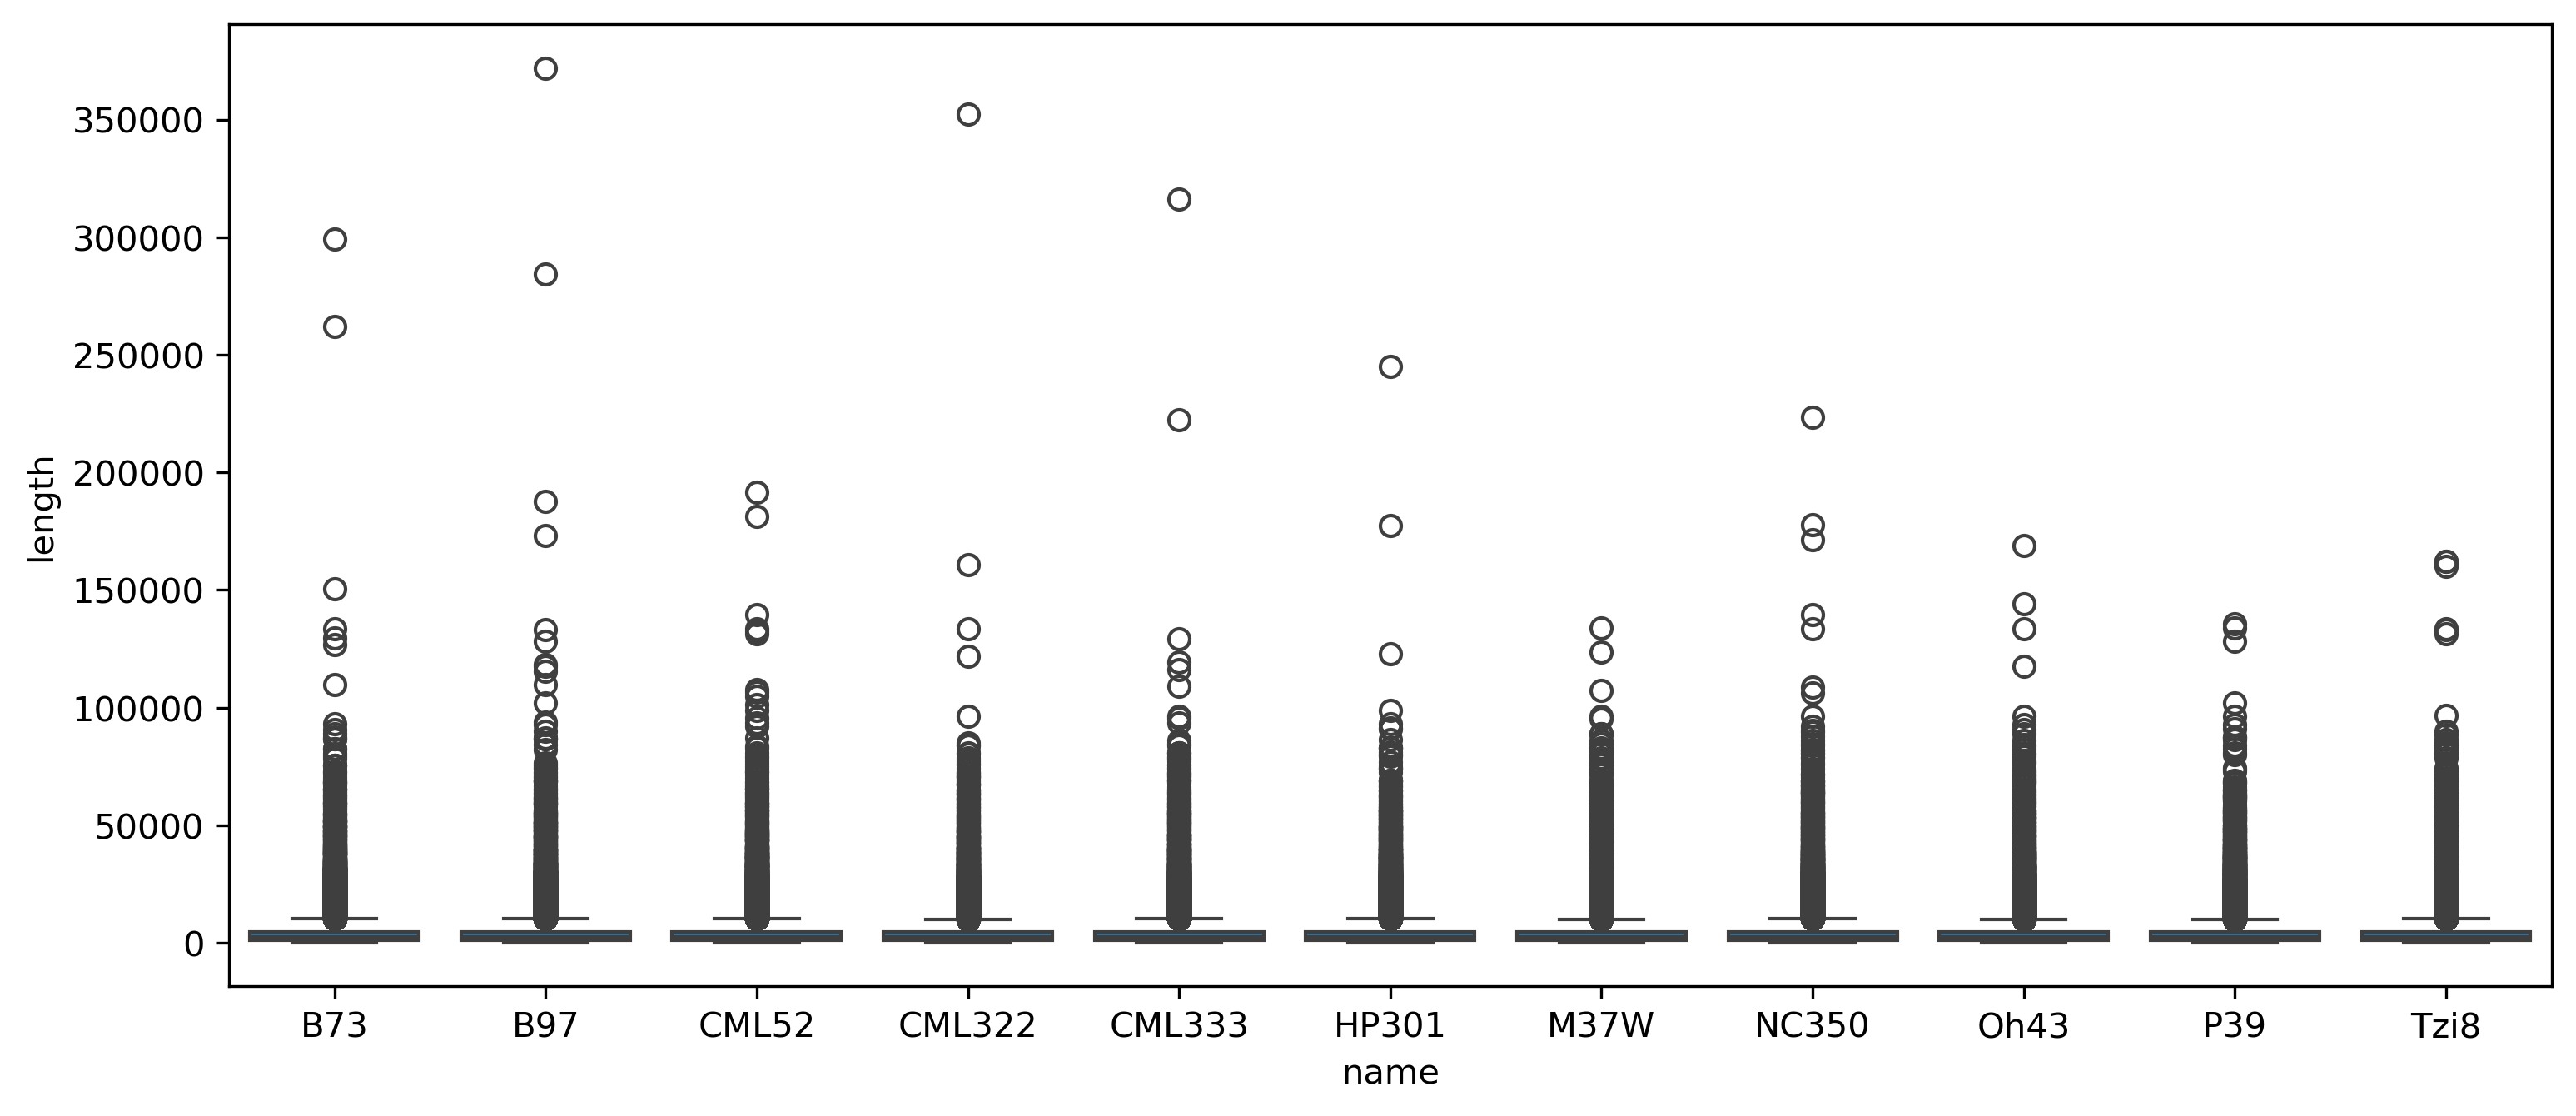

In [21]:
sns.boxplot(data=df, x='name', y='length')

All the boxes are squished at the bottom, so here log scale makes a better choice to visualize boxplot

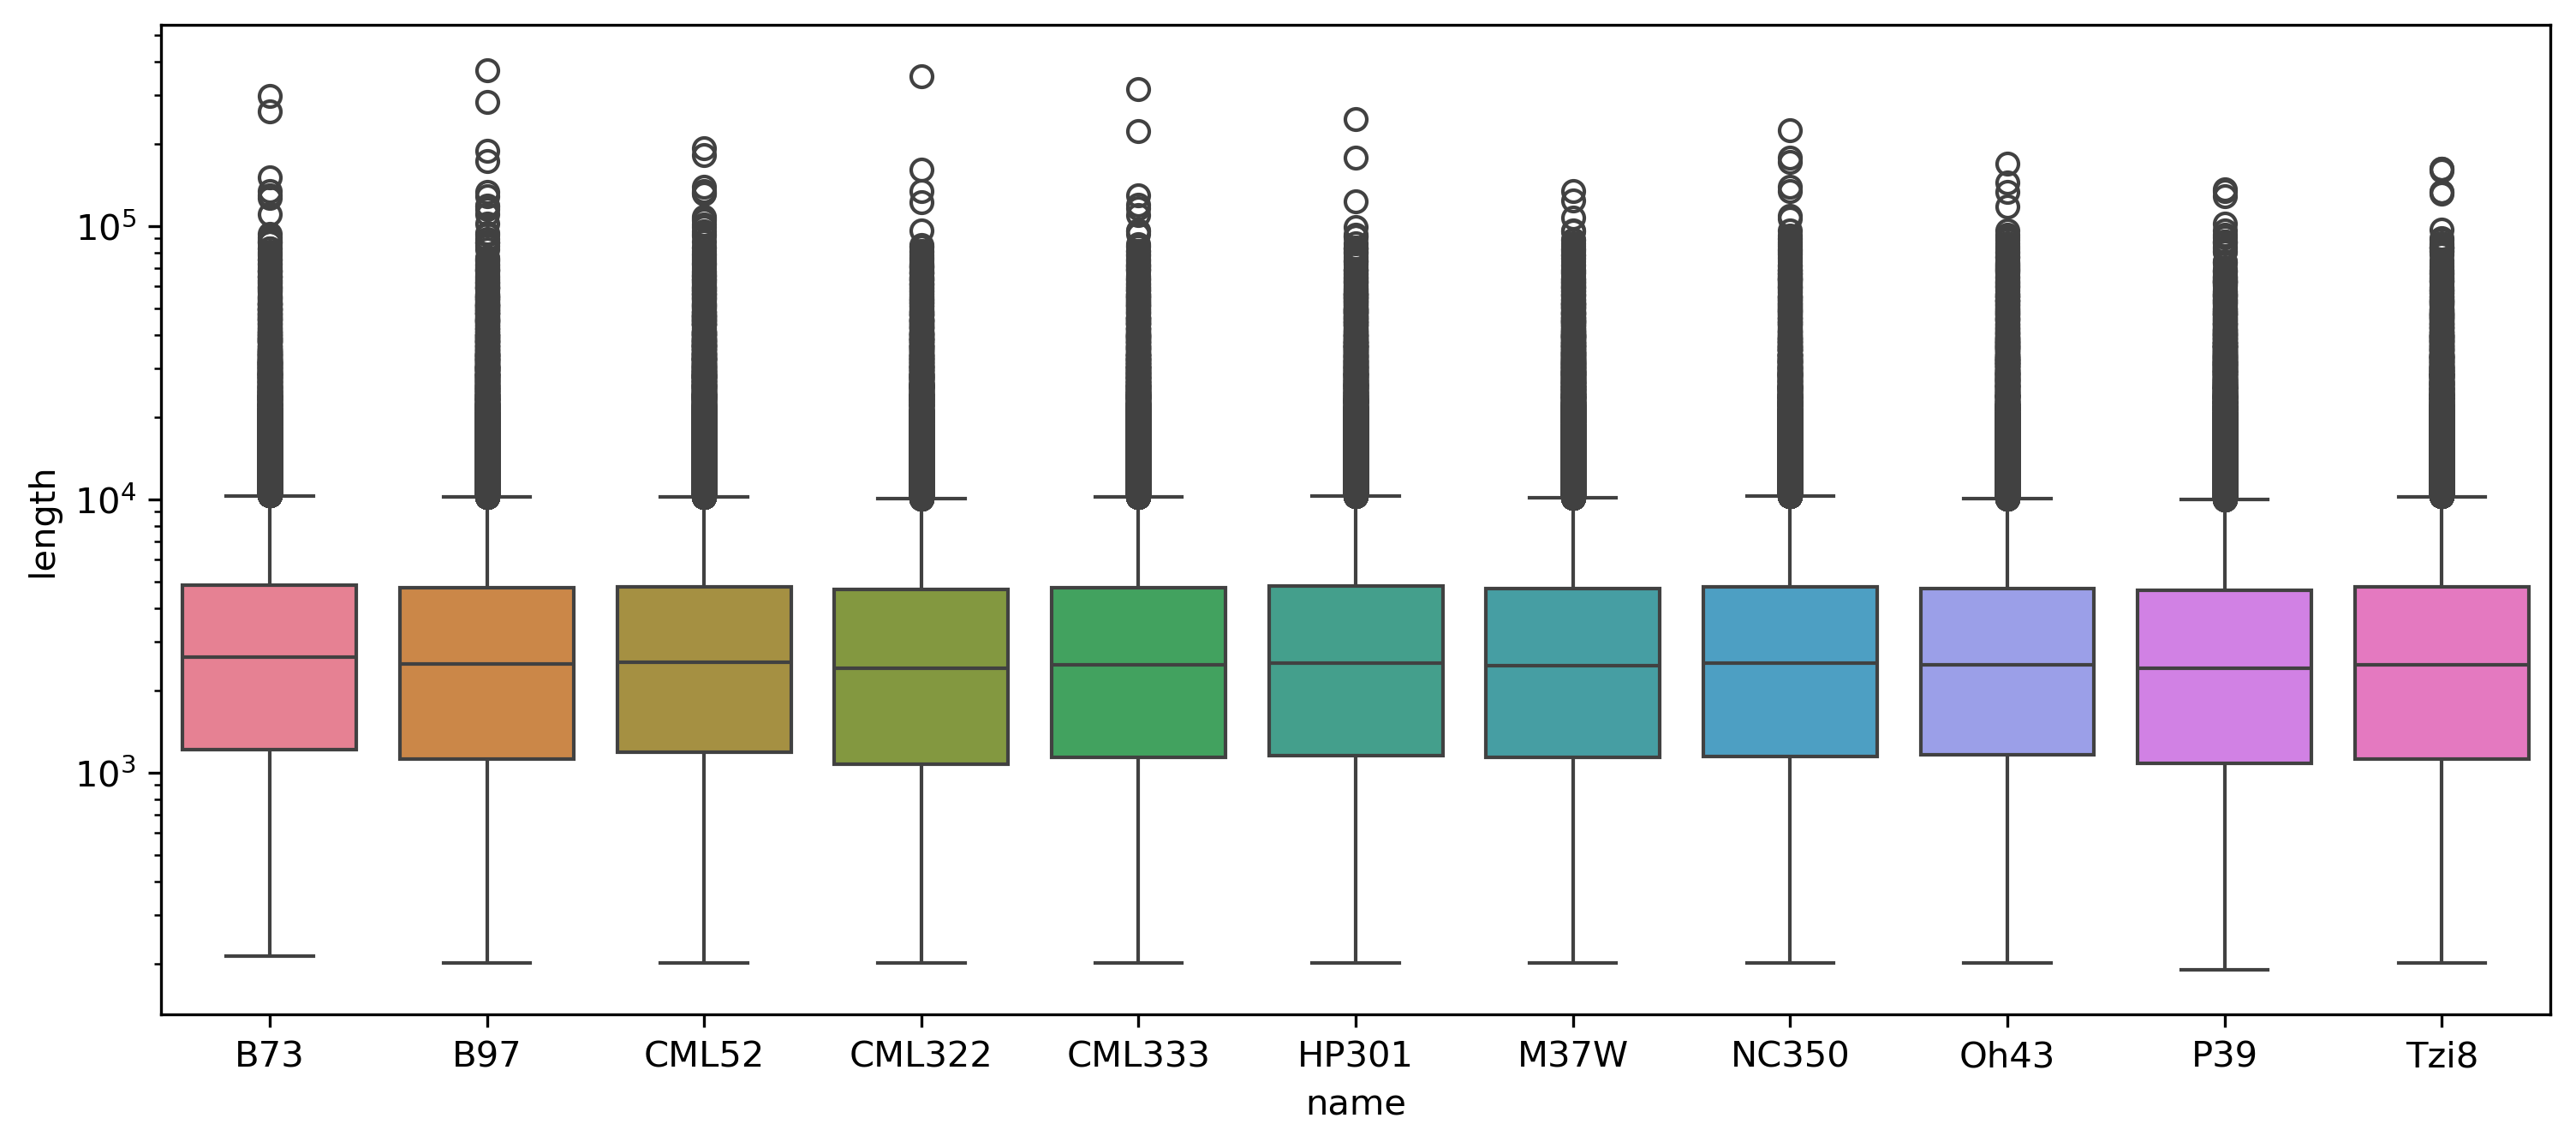

In [22]:
sns.boxplot(data=df, x='name', y='length', hue = 'name')
plt.yscale('log')
plt.show()

Maybe instead of a boxplot, we prefer a violin plot. `sns.violinplot` is a seaborn plot that combines a box plot with a kernel density estimation to provide insights into the distribution and density of a continuous variable across different categories. You will see the boxplot in the center, and the density distribution around it.

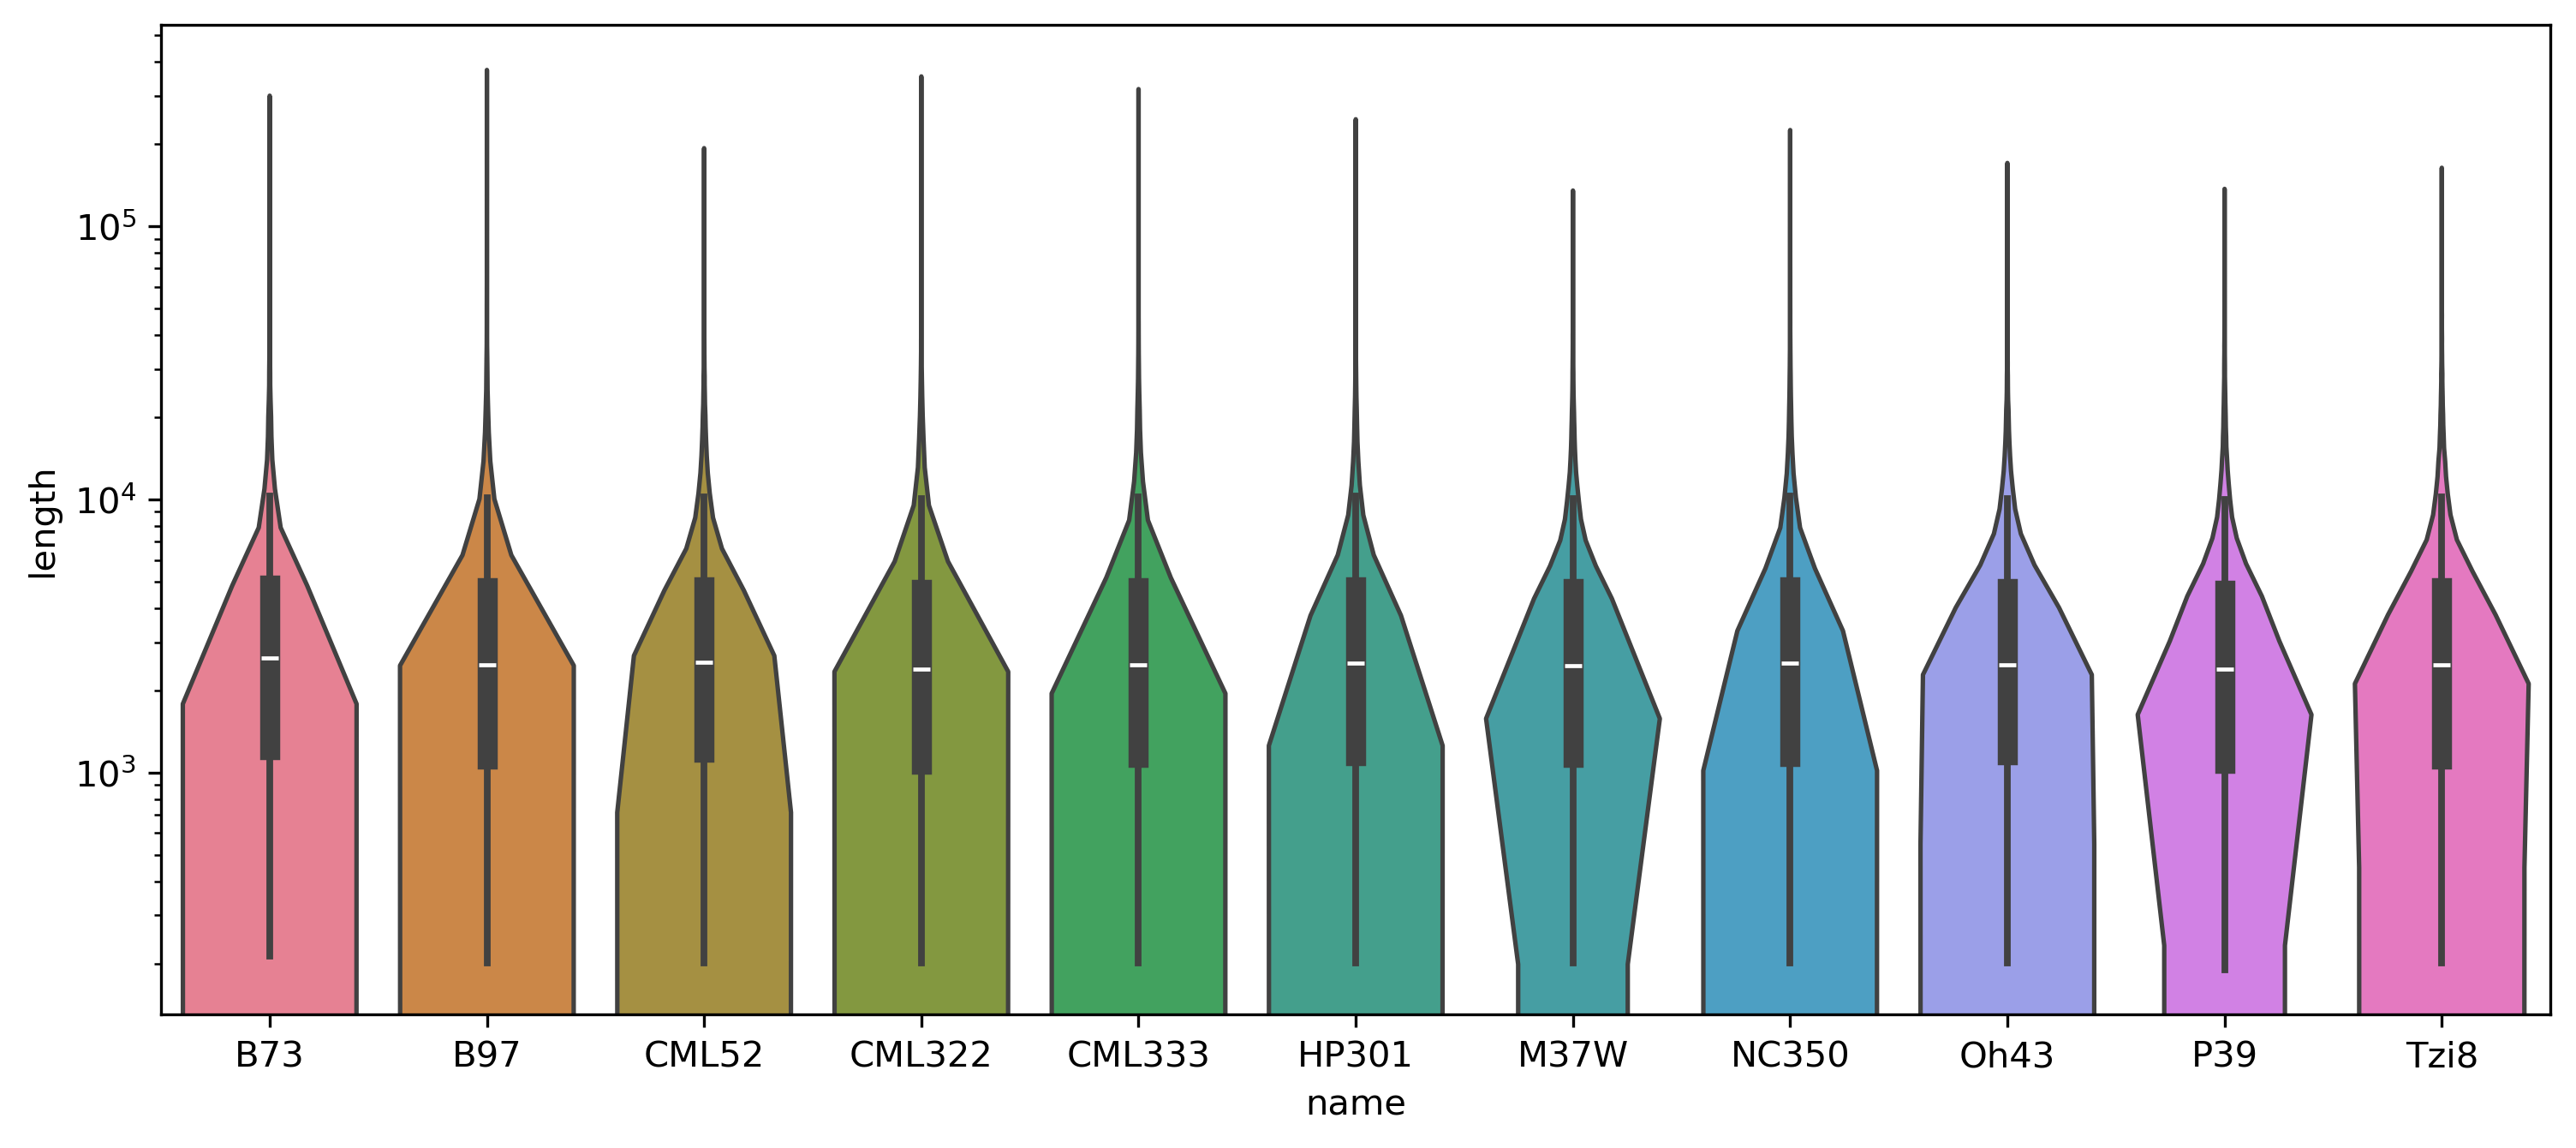

In [24]:
sns.violinplot(data=df, x='name', y='length', hue = 'name')
plt.yscale('log')

A strip plot is another visualization option that draws a scatterplot of individual data points along a categorical axis, similar to a jittered dot plot. `sns.stripplot` can visualize the distribution of data points for a continuous variable within categories. It displays individual data points as strips along a categorical axis, making it useful for understanding the distribution of values within each category and identifying potential outliers or patterns. `stripplot` is particularly effective when dealing with relatively small datasets or when you want to show the raw data points along with their distribution. You will see that the shape is similar to the density part of the violin plot.

<Axes: xlabel='name', ylabel='length'>

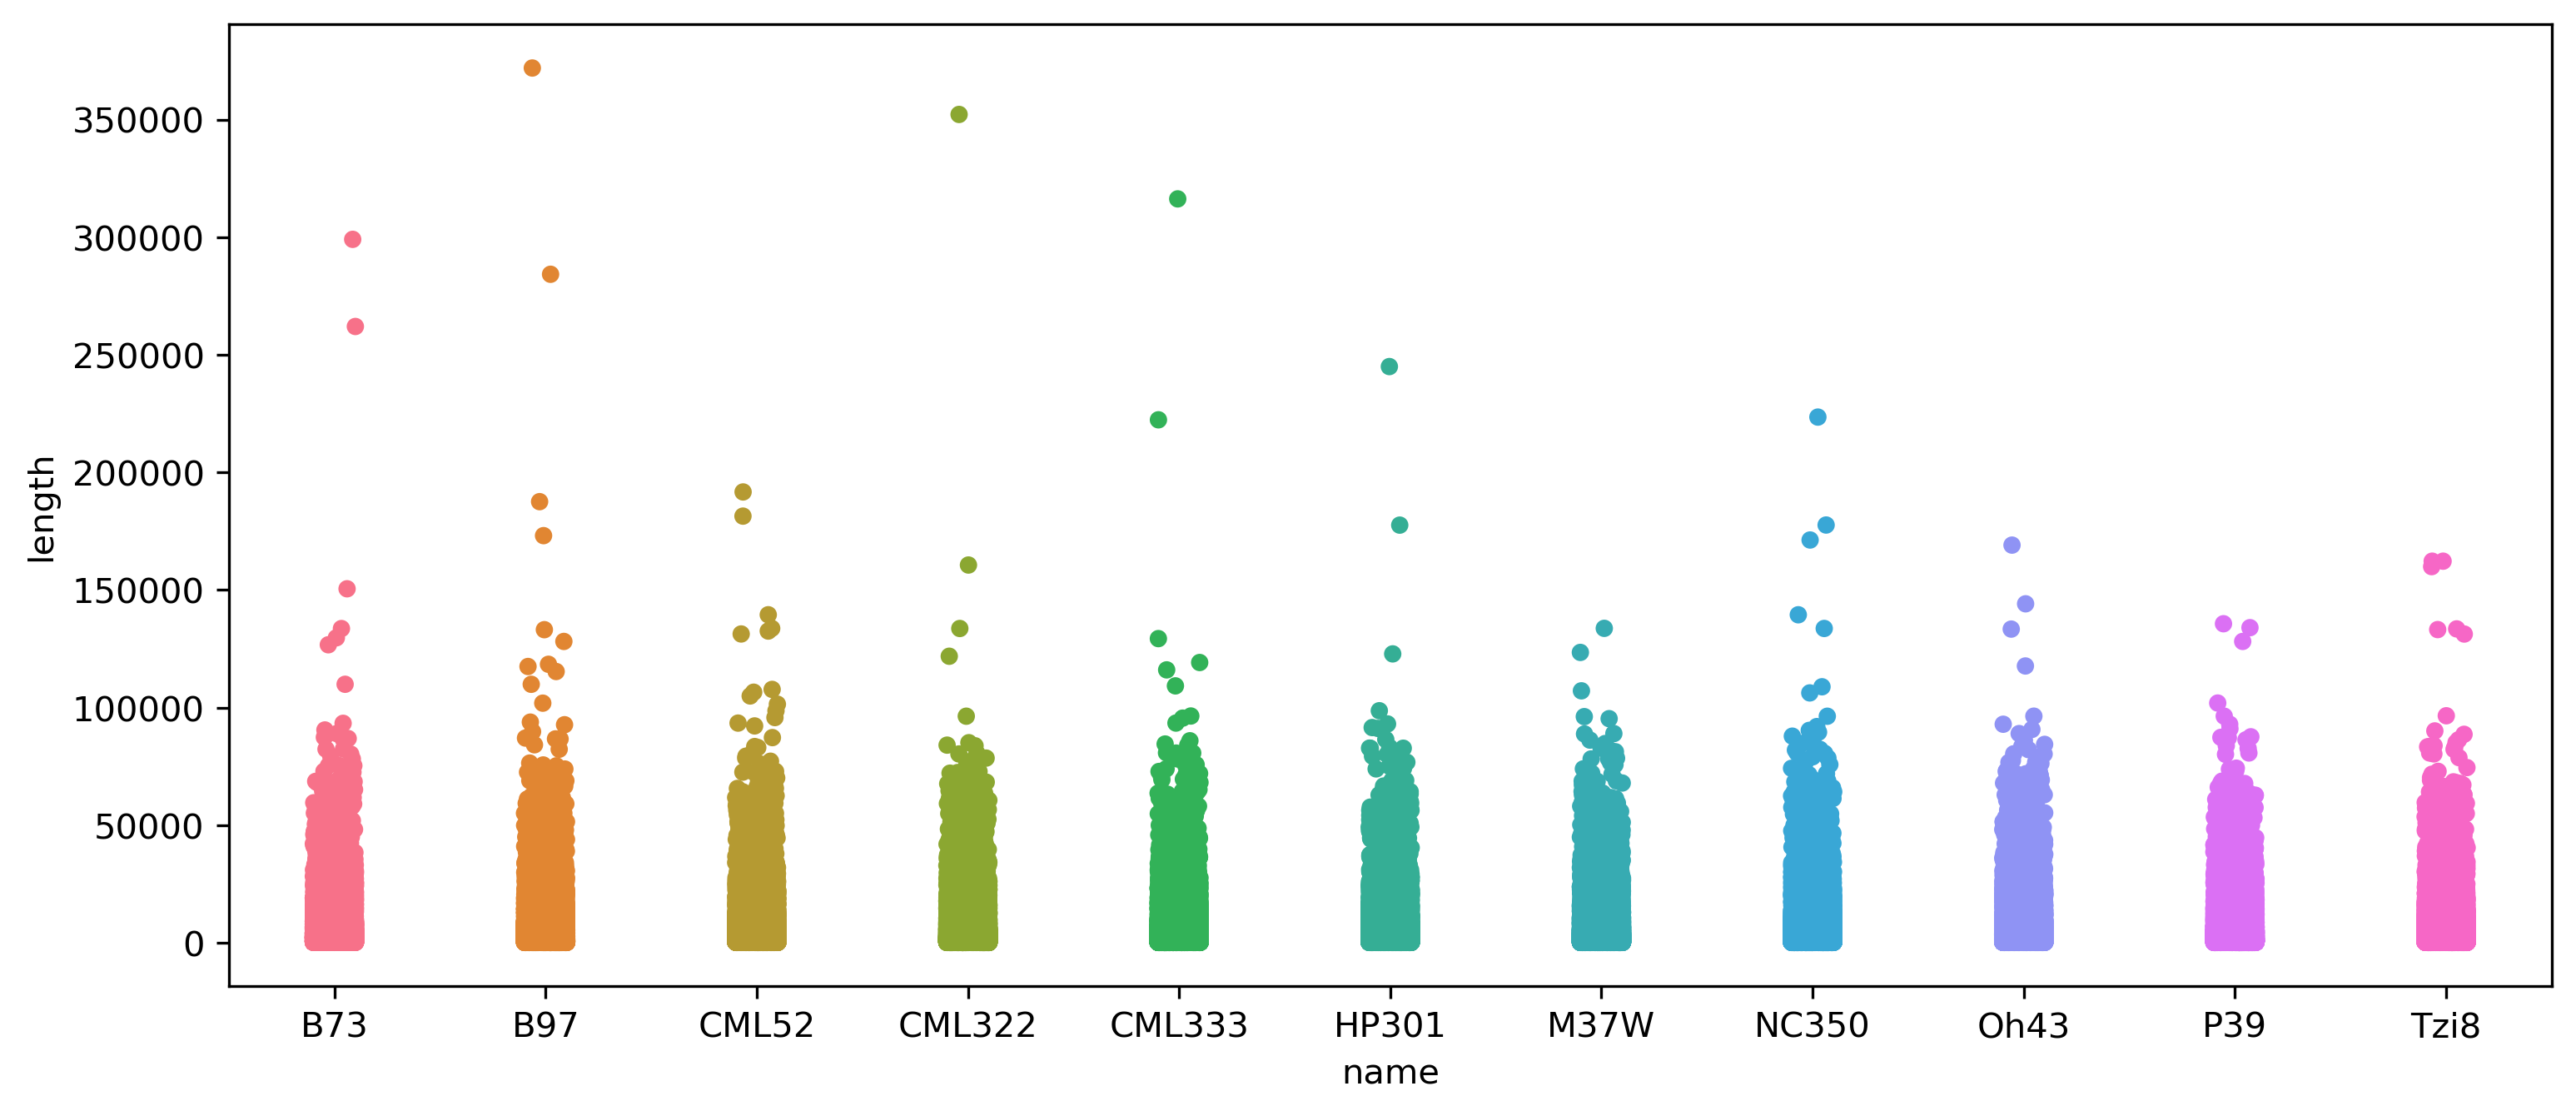

In [13]:
sns.stripplot(data=df, x="name", y="length", hue="name")

We can even combine these, and adjust dot transparency in the strip plot:

<Axes: xlabel='name', ylabel='length'>

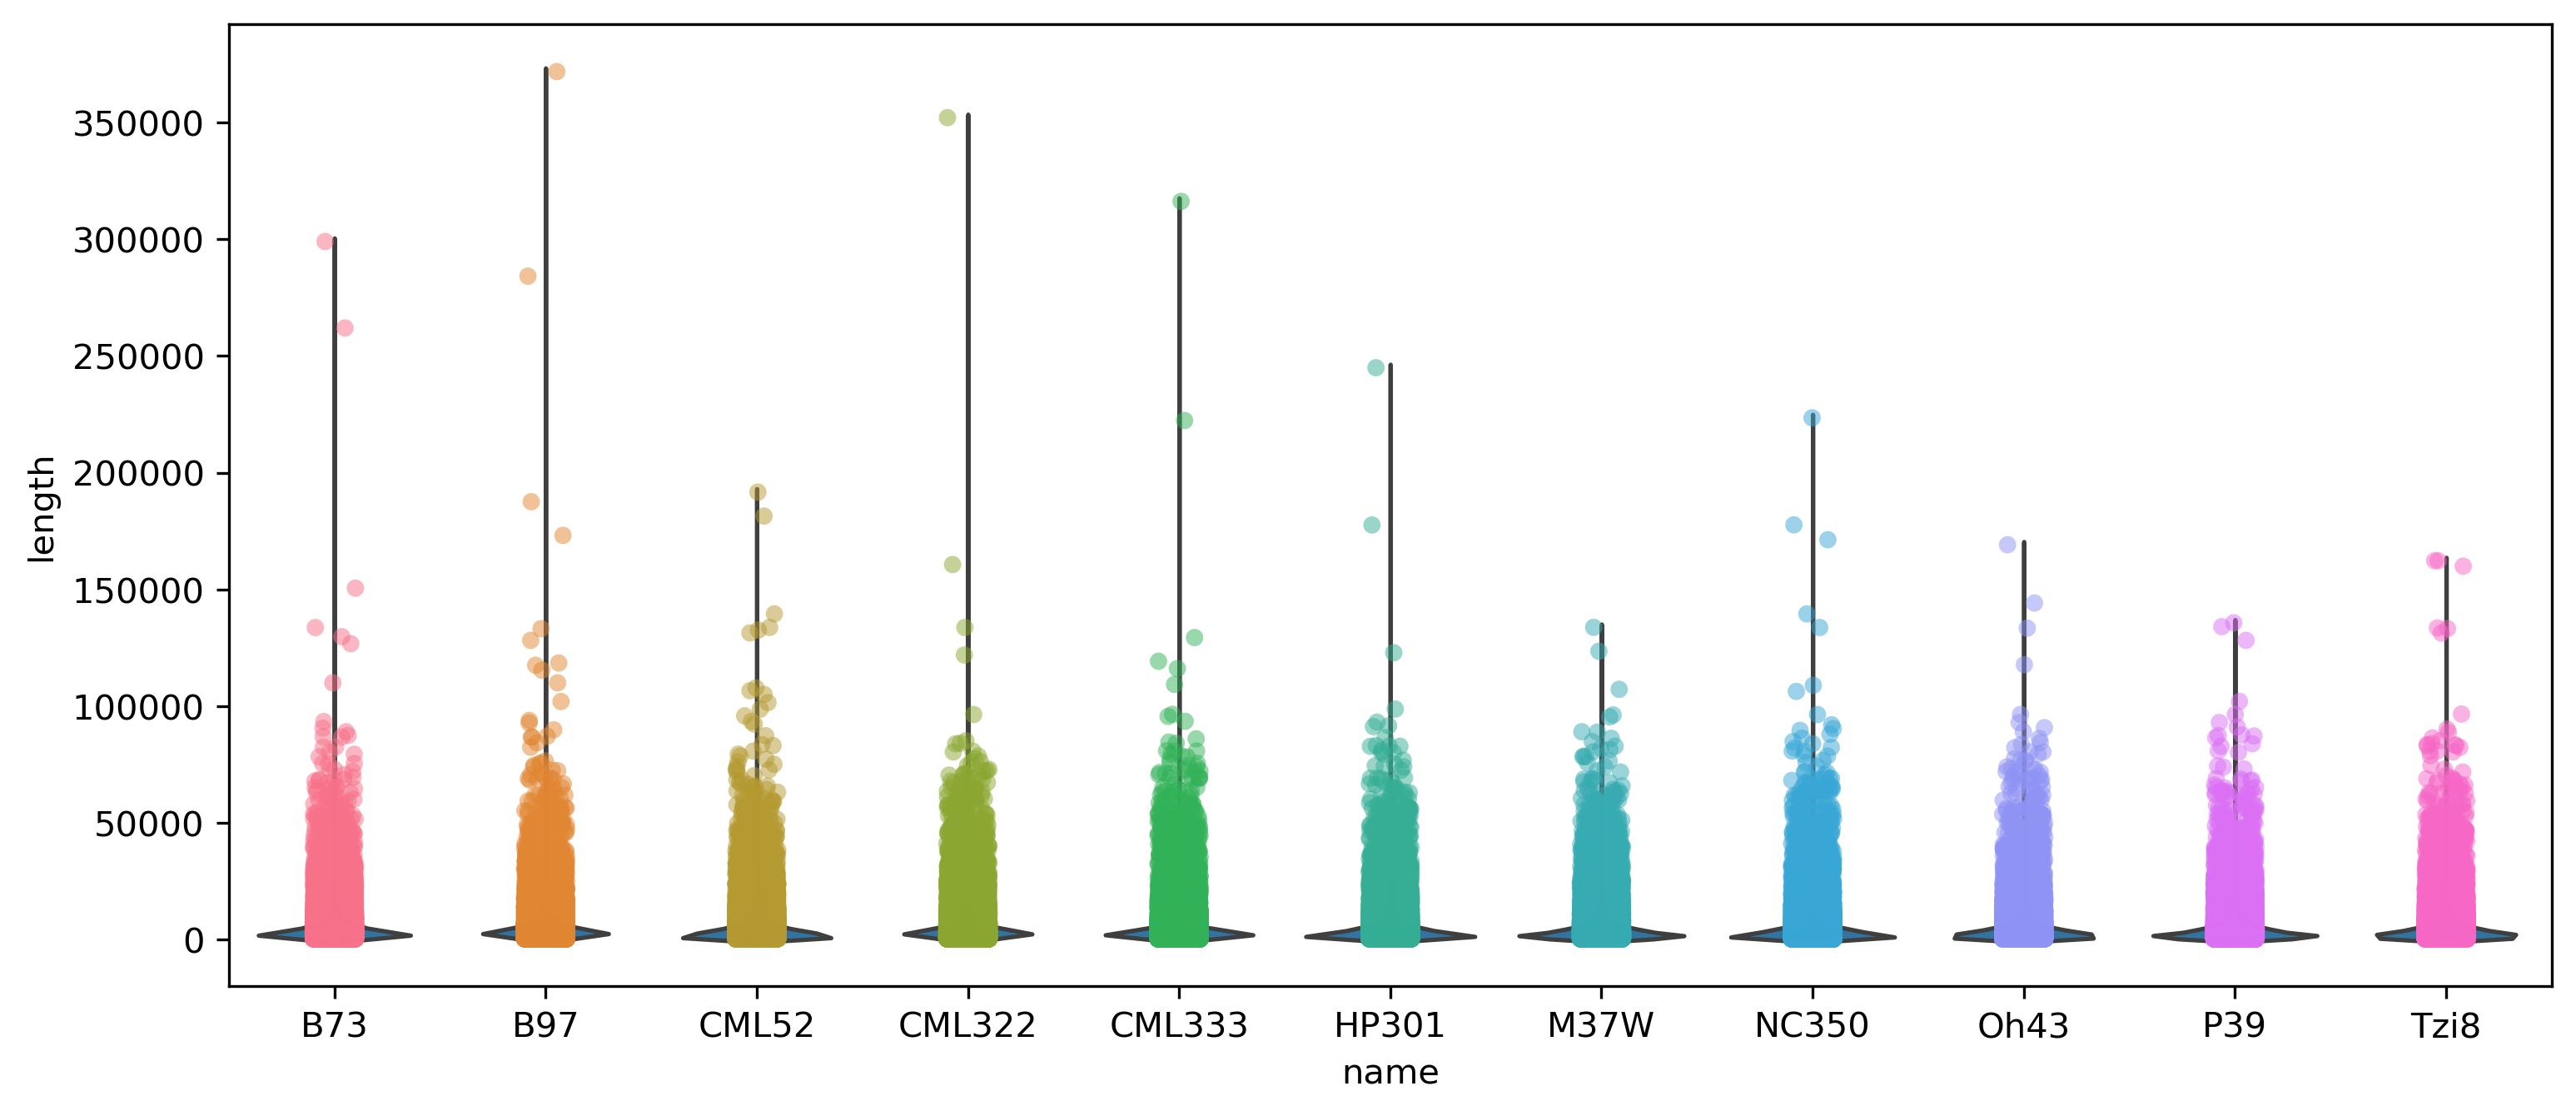

In [30]:
sns.violinplot(data=df, x='name', y='length', inner=None)
sns.stripplot(
    data=df, x="name", y="length", hue="name",
    alpha=.5, legend=False
)
# we can see here that the smooth density of the violin plots belies a lot of data at the higher lengths

Instead of plotting all individual points, you can visualize **summary statistics** such as conditional means using `sns.pointplot()`. To ensure the points align properly with the strip plots, you need to adjust the category width (width) based on the number of hue levels (by default, each category has a width of 0.8).

Note: The default summary statistic is the **mean**. Others will have to be specified (*e.g.*, `estimator=np.median`).

<Axes: xlabel='name', ylabel='length'>

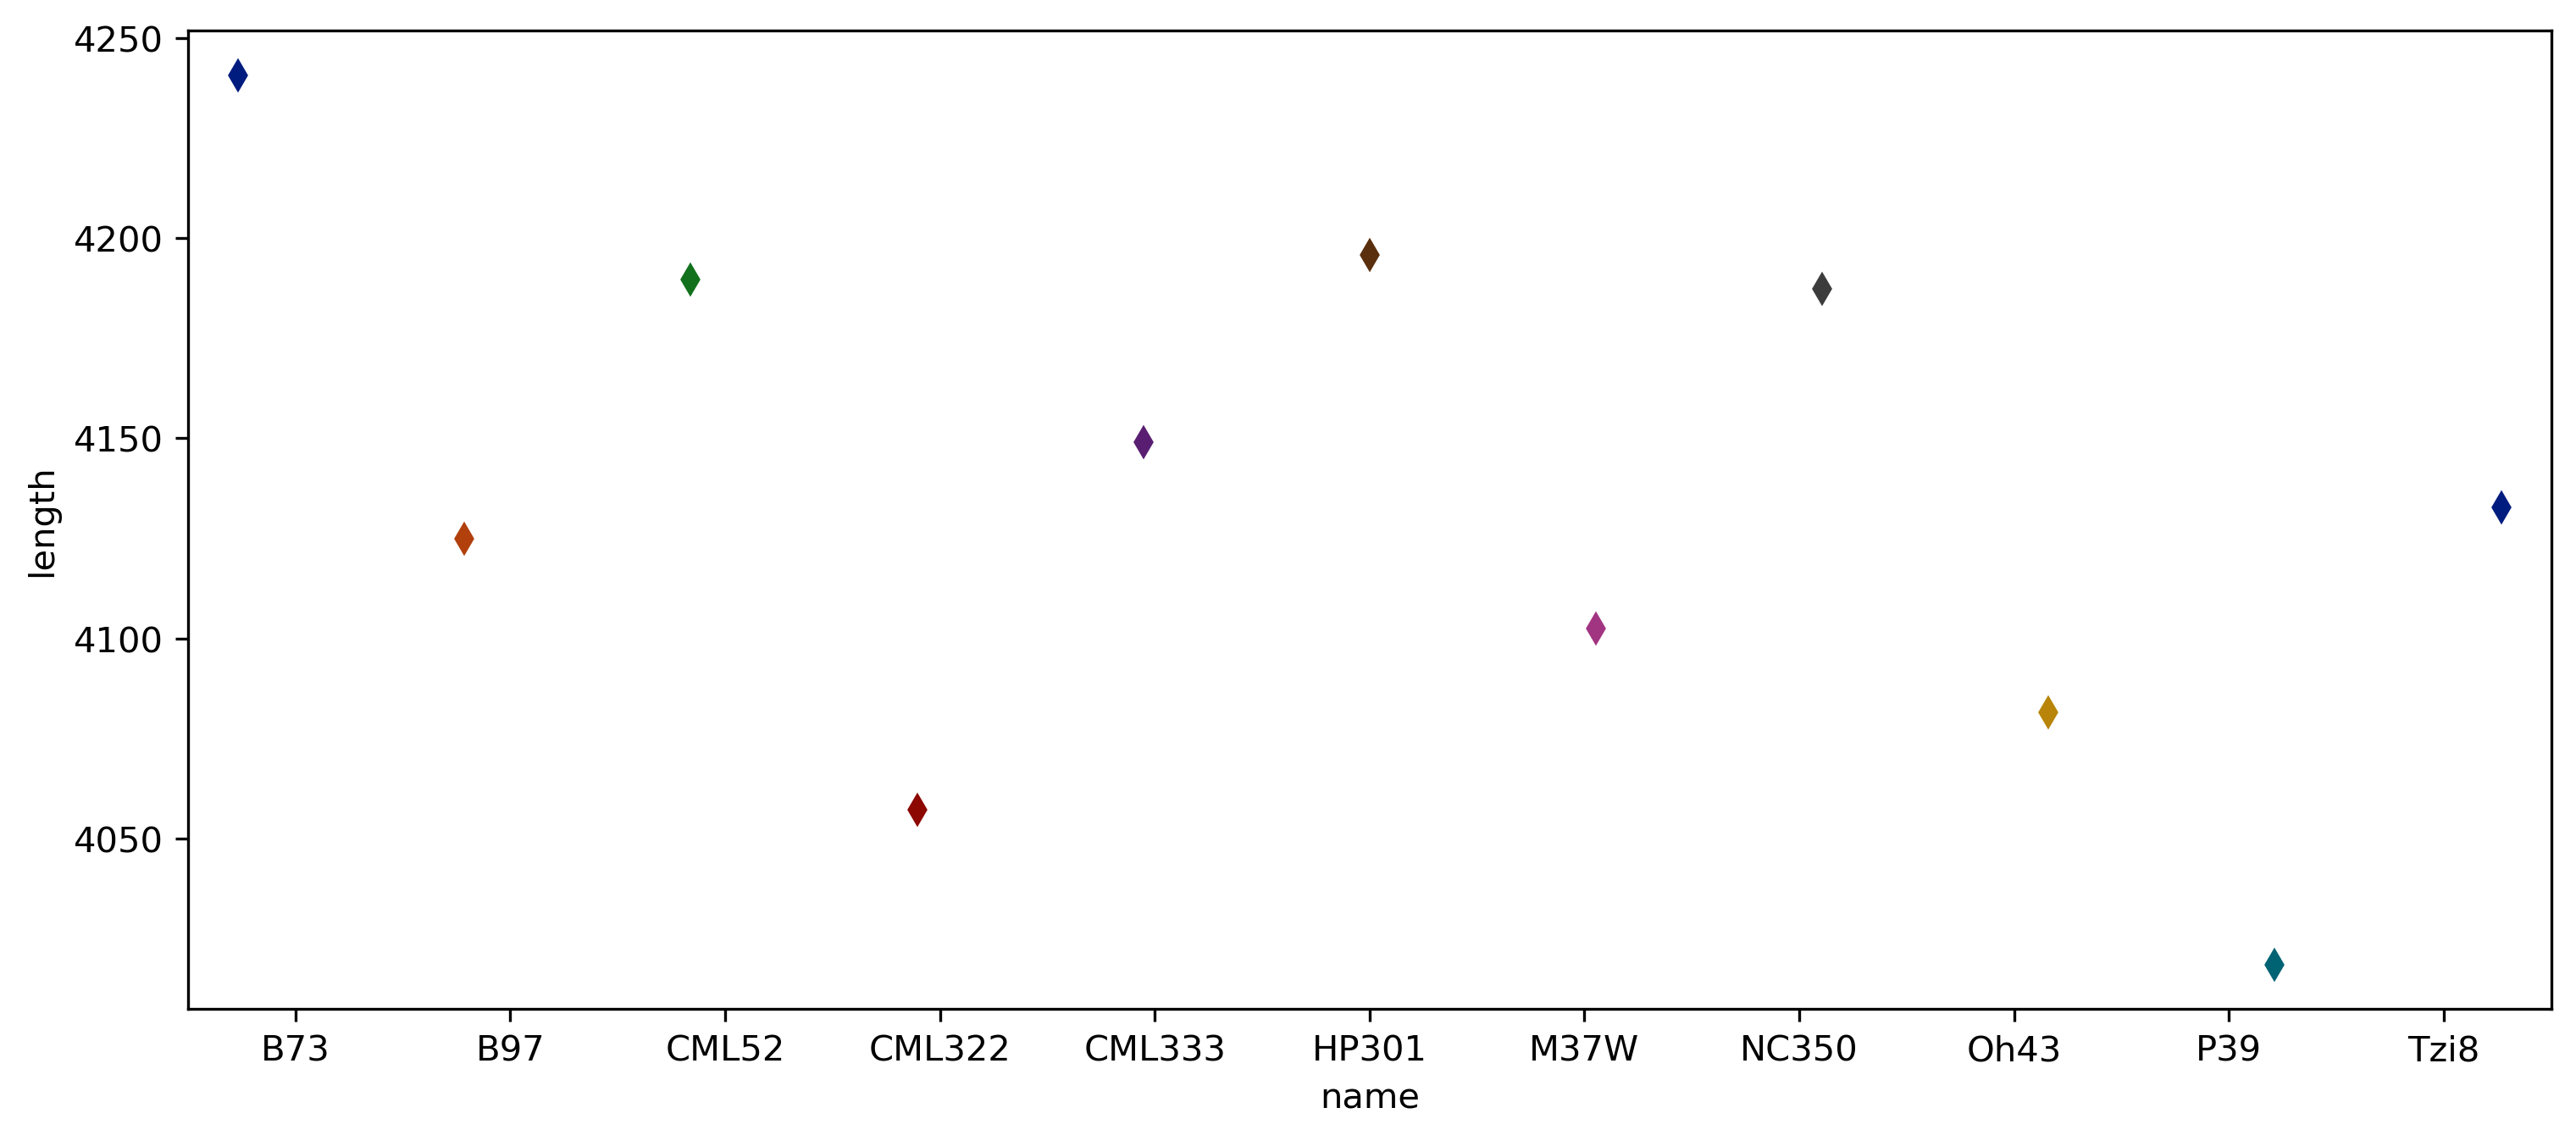

In [15]:
sns.pointplot(
    data=df, x="name", y="length", hue="name",
    dodge=.8 - .8 / 3, palette="dark", errorbar=None,
    markers="d", markersize=4, linestyle="none",
)

## Plotting large distributions

`sns.boxenplot` is a type of seaborn plot used for visualizing the distribution of a continuous variable across different categories. It is an enhanced version of the box plot, also known as a "letter-value plot" or a "raincloud plot", which provides additional quantiles to better represent the shape of the distribution, particularly for larger datasets with more complex distributions. This plot is useful for identifying variations and outliers within each category and comparing distributions between categories.

`sns.boxenplot()` is a Seaborn visualization used to display the distribution of a continuous variable across categories. It is an enhanced version of the box plot, is also known as a letter-value plot, and is designed to provide more detailed quantiles. Where traditional boxplots only show *quartiles*, boxenplots shown multiple *quantiles*, making them  useful for large datasets with complex distributions.

Compared to a traditional box plot, boxenplot:

* Shows more quantiles to reveal the shape of the distribution more accurately
* Handles large datasets better, making it effective for detecting variations and outliers
* Provides a more detailed view of data spread, particularly in skewed or multimodal distributions

This plot  useful for comparing distributions across multiple categories and for identifying patterns, trends, and extreme values.

<Axes: xlabel='name', ylabel='length'>

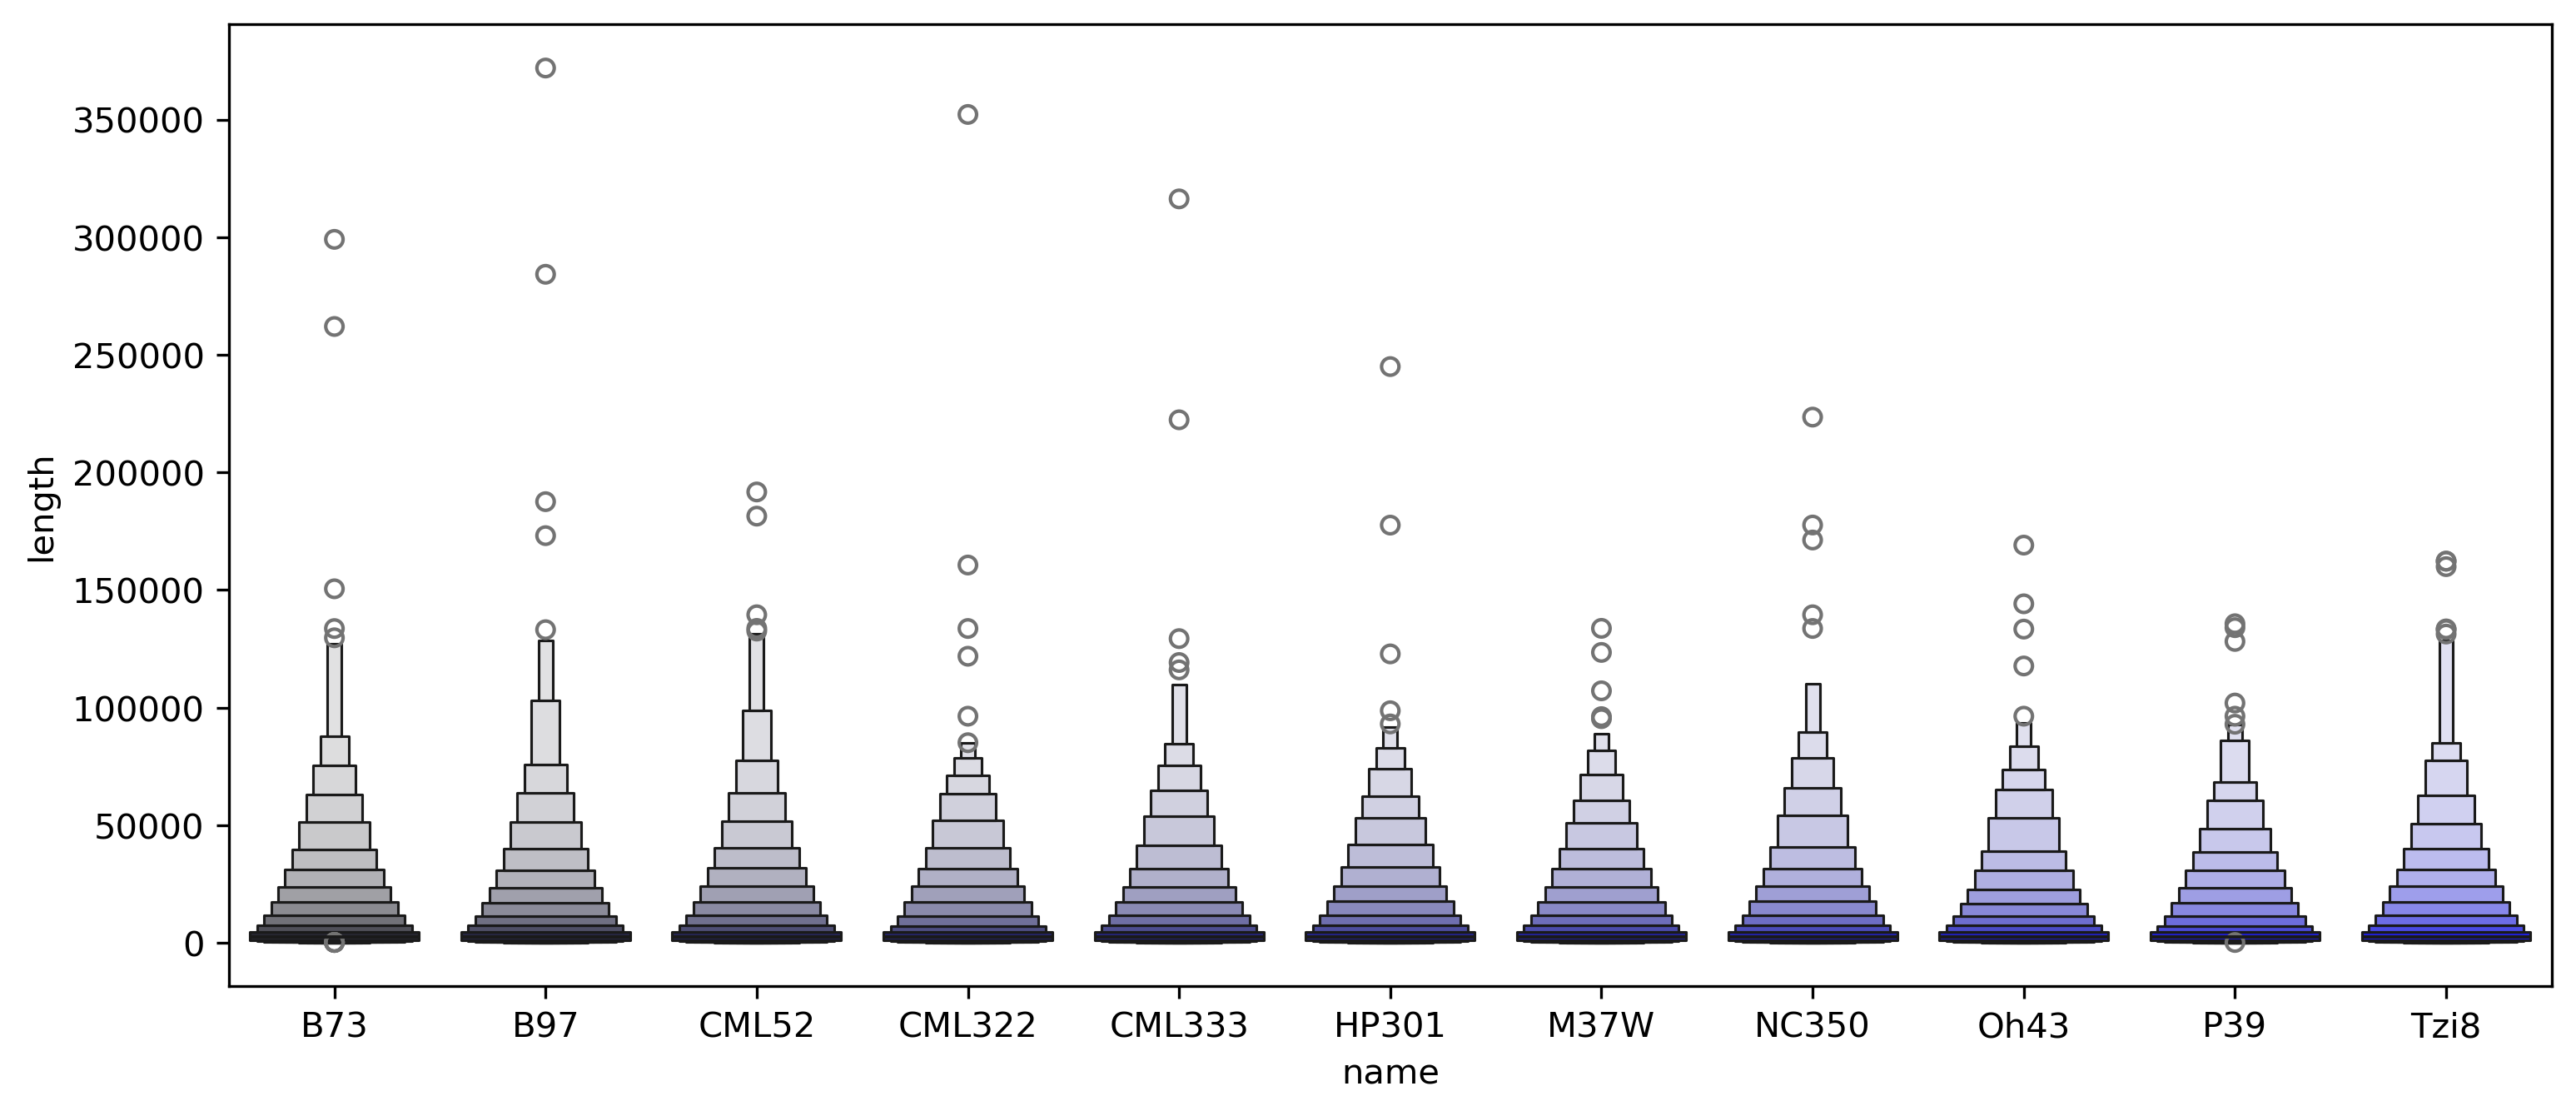

In [16]:
sns.boxenplot(
    data=df, x="name", y="length", hue="name",
    palette='dark:b', width_method="linear",
)